In [1]:
import pandas as pd

# Load the datasets
fraud_data = pd.read_csv('C:/Users/bam/Documents/Data/Fraud_Data.csv')
ip_data = pd.read_csv('C:/Users/bam/Documents/Data/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('C:/Users/bam/Documents/Data/creditcard.csv')

# Preview the datasets
print(fraud_data.head())
print(ip_data.head())
print(creditcard_data.head())


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China


In [2]:
# Check for missing values
print(fraud_data.isnull().sum())
print(ip_data.isnull().sum())
print(creditcard_data.isnull().sum())

# Impute or drop missing values 
fraud_data_cleaned = fraud_data.dropna()
ip_data_cleaned = ip_data.dropna()
creditcard_data_cleaned = creditcard_data.dropna()



user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
# Remove duplicates
fraud_data_cleaned = fraud_data_cleaned.drop_duplicates()
ip_data_cleaned = ip_data_cleaned.drop_duplicates()
creditcard_data_cleaned = creditcard_data_cleaned.drop_duplicates()

# Convert relevant columns to correct data types 
fraud_data_cleaned['signup_time'] = pd.to_datetime(fraud_data_cleaned['signup_time'])
fraud_data_cleaned['purchase_time'] = pd.to_datetime(fraud_data_cleaned['purchase_time'])

# Convert IP address to integer 
fraud_data_cleaned['ip_address'] = fraud_data_cleaned['ip_address'].astype(int)
ip_data_cleaned['lower_bound_ip_address'] = ip_data_cleaned['lower_bound_ip_address'].astype(int)
ip_data_cleaned['upper_bound_ip_address'] = ip_data_cleaned['upper_bound_ip_address'].astype(int)

print(fraud_data_cleaned.dtypes)


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int32
class                      int64
dtype: object


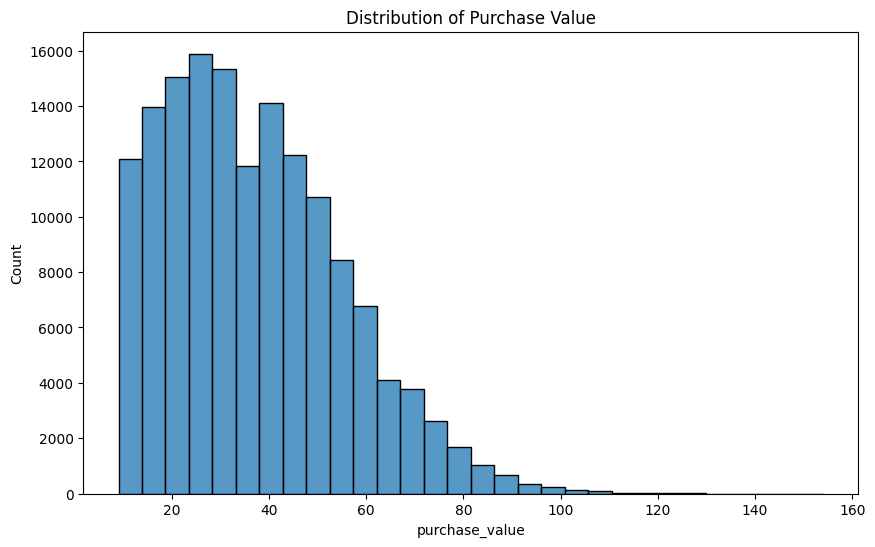

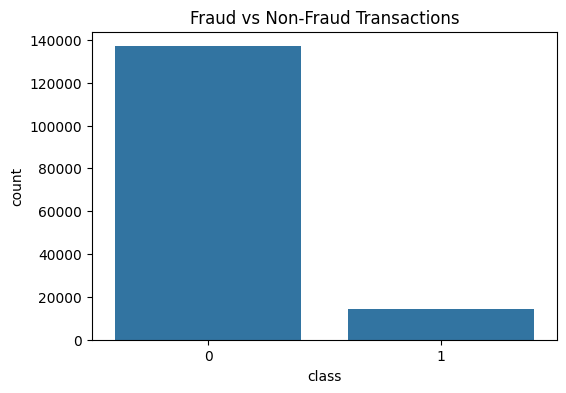

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(fraud_data_cleaned['purchase_value'], bins=30)
plt.title('Distribution of Purchase Value')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=fraud_data_cleaned)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


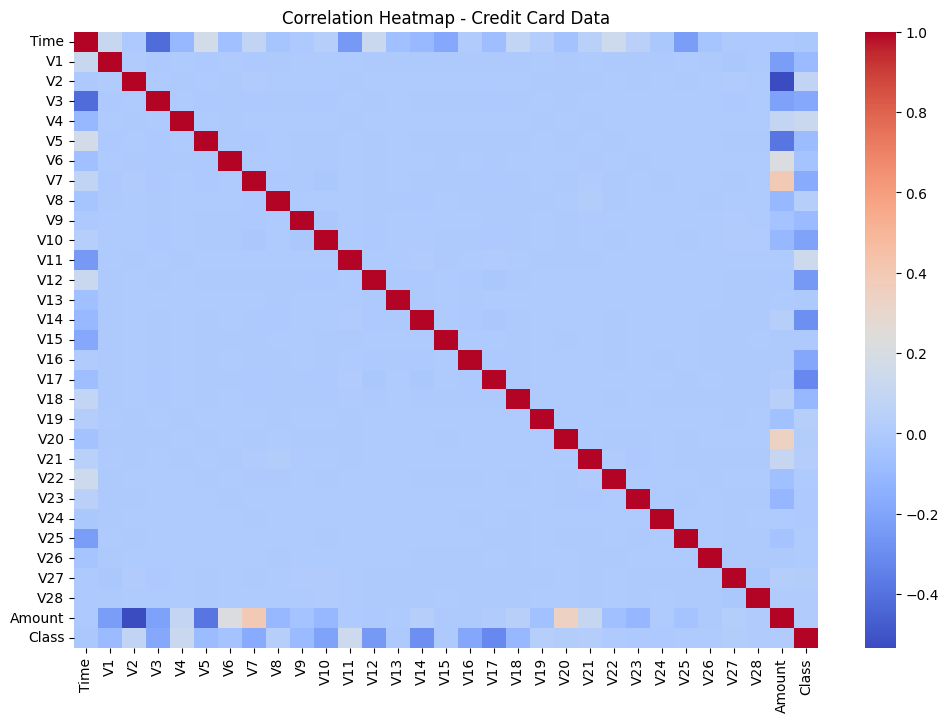

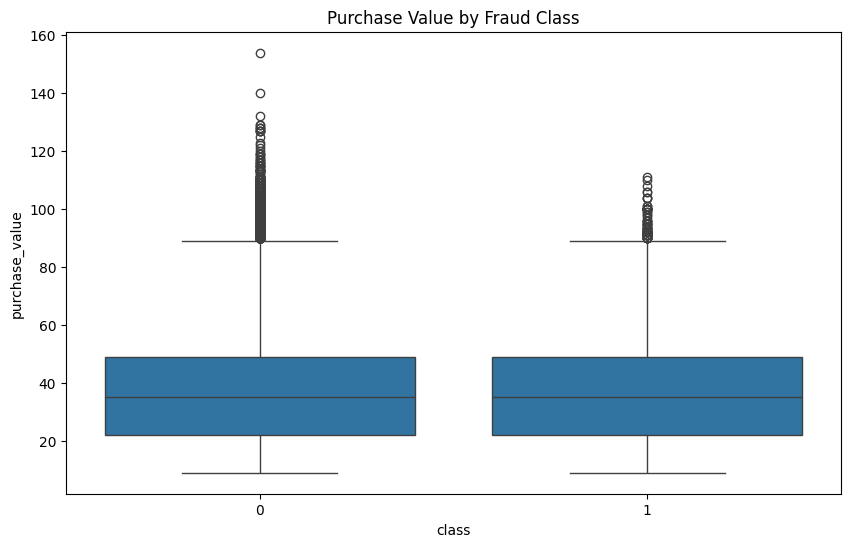

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(creditcard_data_cleaned.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap - Credit Card Data')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data_cleaned)
plt.title('Purchase Value by Fraud Class')
plt.show()


In [12]:
import pandas as pd

fraud_data_cleaned = fraud_data_cleaned.sort_values('ip_address')
ip_data_cleaned = ip_data_cleaned.sort_values('lower_bound_ip_address')

merged_data = pd.merge_asof(fraud_data_cleaned, ip_data_cleaned,
                            left_on='ip_address',
                            right_on='lower_bound_ip_address',
                            direction='backward')

merged_data = merged_data[
    (merged_data['ip_address'] >= merged_data['lower_bound_ip_address']) & 
    (merged_data['ip_address'] <= merged_data['upper_bound_ip_address'])
]
print(merged_data.head())


   user_id         signup_time       purchase_time  purchase_value  \
0   138208 2015-06-10 07:02:20 2015-07-21 02:03:53              20   
1     3674 2015-05-23 01:47:03 2015-08-09 21:05:04              12   
2   329438 2015-02-07 20:36:48 2015-02-28 21:43:52              18   
3   319411 2015-01-08 11:11:50 2015-03-06 23:37:00              36   
4    24894 2015-01-07 05:59:11 2015-01-07 05:59:12              35   

       device_id  source  browser sex  age  ip_address  class  \
0  ZINIADFCLHYPG  Direct       IE   M   38 -2147483648      0   
1  TXBWHOEFQOCTL     SEO   Chrome   M   22 -2147483648      0   
2  QSHYBRYJBNKMU     SEO       IE   M   24 -2147483648      0   
3  CJHWRXISOAYTL     SEO       IE   M   48 -2147483648      0   
4  NWREMPUXZSXWE     SEO  FireFox   F   46 -2147483648      1   

   lower_bound_ip_address  upper_bound_ip_address    country  
0             -2147483648             -1106886657  Venezuela  
1             -2147483648             -1106886657  Venezuela  

In [13]:
# Create time-based features
fraud_data_cleaned['hour_of_day'] = fraud_data_cleaned['purchase_time'].dt.hour
fraud_data_cleaned['day_of_week'] = fraud_data_cleaned['purchase_time'].dt.dayofweek

# Create transaction frequency and velocity features
fraud_data_cleaned['transaction_frequency'] = fraud_data_cleaned.groupby('user_id')['purchase_time'].transform('count')
fraud_data_cleaned['transaction_velocity'] = fraud_data_cleaned.groupby('user_id')['purchase_time'].transform(lambda x: x.diff().mean().total_seconds())

print(fraud_data_cleaned[['user_id', 'transaction_frequency', 'transaction_velocity', 'hour_of_day', 'day_of_week']].head())


        user_id  transaction_frequency  transaction_velocity  hour_of_day  \
151111   138208                      1                   NaN            2   
121124     3674                      1                   NaN           21   
63344    329438                      1                   NaN           21   
121121   319411                      1                   NaN           23   
121122    24894                      1                   NaN            5   

        day_of_week  
151111            1  
121124            6  
63344             5  
121121            4  
121122            2  
